# EDA on CardioGoodfitness Data set
About dataset,
- Product - purchased product
- Age - age of the customers in years
- Gender - gender of the cutomers
- Education - about customers education in years
- MaritalStatus - relationship status
- Usage - average number of times the customer plans to use the treadmill each week
- Fitness - self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape
- Income - annual household income ($)
- Miles -  average number of miles the customer expects to walk/run each week 

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Dataset
df=pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
df.shape

(180, 9)

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
# How many unique products are there?
df['Product'].nunique()

3

<AxesSubplot:>

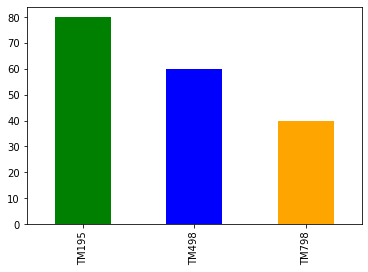

In [7]:
# which product is highly used
df['Product'].value_counts().plot.bar(color=['green','blue','orange'])

- TM195 is the highly used product

<AxesSubplot:xlabel='Product', ylabel='count'>

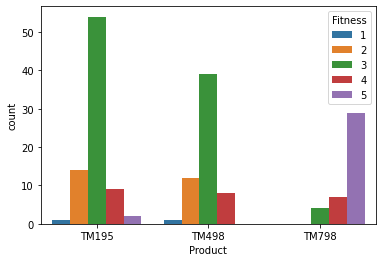

In [8]:
sns.countplot(df['Product'],hue=df['Fitness'])

-------------------------------------------------------------------------------------------------
- TM195 - This is the highly used product but most of the customers rated 3
- TM798 - Less number of customers used this product but its more customers rated 5
- TM498 - More customers rated 3 and this product had not even a single 5
-------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='Product', ylabel='Income'>

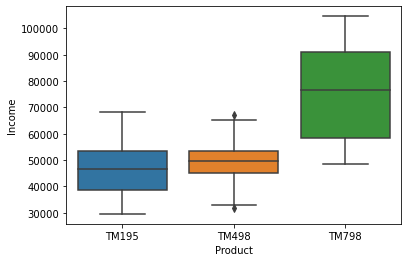

In [9]:
sns.boxplot(x='Product',y='Income',data=df)

--------------------------------------------------------------------------------------------------------------
- Customers who uses " TM798" they earn more than 60,000 upto 90,000
- But Customers who uses " TM195 " & " TM498 " they earn 40,000 upto 54,000
- As we know,among all three products TM195 is highly used and it is bought by low income customers 
--------------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='Product', ylabel='Miles'>

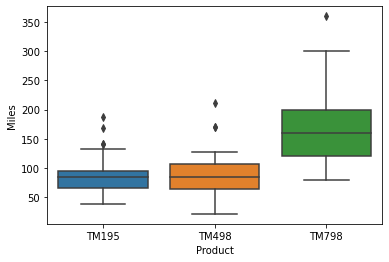

In [10]:
sns.boxplot(x='Product',y='Miles',data=df)

----------------------------------------------------------------------------------------------------------------------------
- TM798 - All Cutomers who use TM798, they walk more than 100 miles. So they got benefit so that they rated 5 for this product.
- TM195 - This is mostly used product but its most of the customers didn't walk atleast more than 100 miles. So they got less benefit while comparing with TM798 users.
- TM498 - This is secondly most uesd product, its maximum number of customers only walks less than 150 miles. They also got less benefits.
- Summary : Customers who earn low income, they walks less number of miles. Customers who earn more income, they walks more number of miles
------------------------------------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='Product', ylabel='Age'>

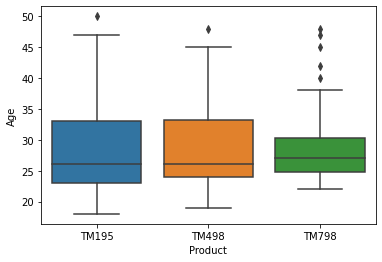

In [11]:
sns.boxplot(x='Product', y='Age', data=df)

--------------------------------------------------------------------------
- TM798 - 75% of customers age ranges between 26 to 30 and maximum age is approximately below 40, so that they can walk more miles than other users.
- TM195, TM498 -  75% of customers age ranges between 26 to 34 and maximum age is approximately above 45. 
--------------------------------------------------------------------------

<AxesSubplot:xlabel='Product'>

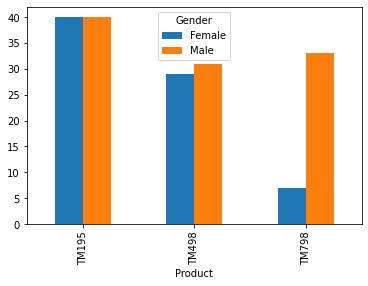

In [12]:
# Products used by gender
pd.crosstab(df.Product,df.Gender).plot.bar()

--------------------------------------------------------------------------------------
- TM195 - both male and female equally used this product
- TM498, TM798 - while comparing with female, more number of male customers used this product
- while compared with TM195 & TM498, very less number of female used TM798 product
--------------------------------------------------------------------------------------

<AxesSubplot:xlabel='Gender', ylabel='count'>

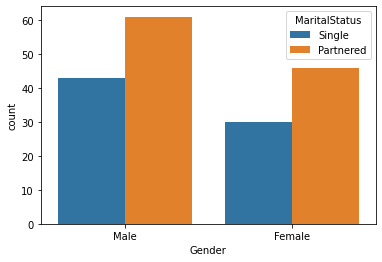

In [13]:
sns.countplot(df['Gender'], hue=df['MaritalStatus'])

------------------------------------------------------------------------------------
- These products were highly used by Partnered people in both  type of Gender 
------------------------------------------------------------------------------------

<AxesSubplot:xlabel='Income', ylabel='MaritalStatus'>

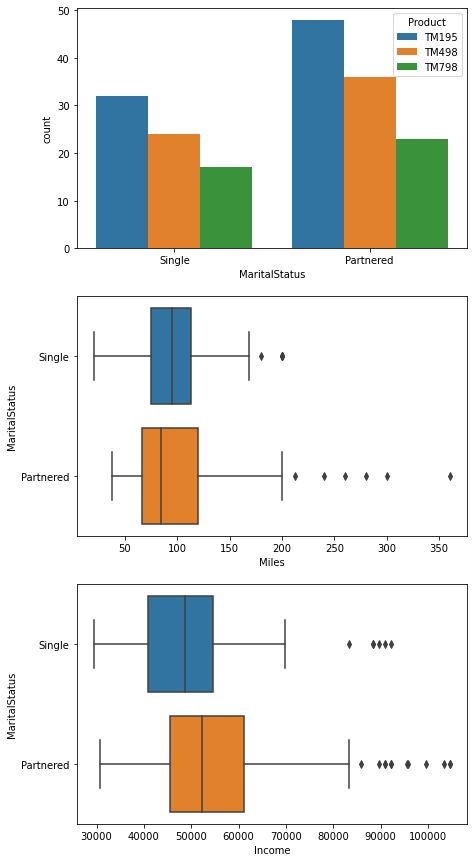

In [14]:
# The products relationship with MaritalStatus
plt.figure(figsize=(7,15))
plt.subplot(3,1,1)
sns.countplot(df['MaritalStatus'], hue=df['Product'])
plt.subplot(3,1,2)
sns.boxplot(x='Miles', y='MaritalStatus',data=df)
plt.subplot(3,1,3)
sns.boxplot(x='Income', y='MaritalStatus',data=df)

-------------------------------------------------------------------------
- Partnered(married) customers were used more number of products while comparing with single customers and most of the partnered customers were used TM195. (fig-1)
- Partnered(married) customers walked more number of miles than single cutomers. (fig-2)
- More over Partnered(married) customers were earned more income. (fig-3)
-------------------------------------------------------------------------

<AxesSubplot:xlabel='Usage', ylabel='count'>

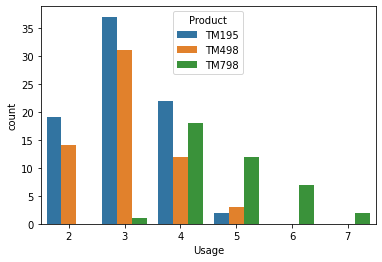

In [15]:
sns.countplot(df['Usage'], hue=df['Product'])

--------------------------------------------------------
- TM195, TM498 - Customers used this TM195 and TM498 approximately 2 to 4 times per week
- TM798 - Customers used this TM195 approximately 4 to 7 times per week
------------------------------------------------------------------